# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [2]:
cast = pd.read_csv("data/cast.csv")
release_dates = pd.read_csv("data/release_dates.csv")
titles = pd.read_csv("data/titles.csv")

In [3]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [4]:
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443486 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [5]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226013 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [6]:
cast.isnull().sum()

title              0
year               0
name               0
type               0
character          0
n            1327783
dtype: int64

In [7]:
release_dates.isnull().sum()

title      0
year       0
country    0
date       0
dtype: int64

In [8]:
titles.isnull().sum()

title    0
year     0
dtype: int64

Cast has 3442902 different entries, release dates have 443486 different entries and titles has 226013 different entries.
each one is compromised by both object and integers data types. 

Cast is 157.6 mb's
Release date is 13.5 mb's
Titles is 3.4 mb's making it the smallest dataset.


Cast does have null values in the 'n' column which represents the actor and their position. Meaning it should be something to look forward to when looking at the data frame.

### 2. How many movies have the title North by Northwest

In [9]:
titles[titles['title'].str.contains("North by Northwest")]

,title,year
201761,North by Northwest,1959


1 movie in 1959

### 3. How many version of Hamlet are there, when was the first made? the last?

In [10]:
titles[titles['title'] == "Hamlet"].sort_values(by=['year']).count()

title    20
year     20
dtype: int64

first one was in 1910 the last one was in 2017
there are 20 versions

### 4. List all the movies called Treasure Island from oldest to newest

In [11]:
titles[titles['title'] == "Treasure Island"].sort_values(by=['year'])

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [12]:
titles[(titles['year'] == 1950) | (titles['year'] == 2019) | (titles['year'] == 1980) | (titles['year'] == 2000)].groupby('year').size()

year
1950    1109
1980    1750
2000    2568
2019     975
dtype: int64

We can draw the conclusion that as the years went by more movies were made.

### 6. How big was the cast of Metropolis


In [13]:
cast[cast['title'] == "Metropolis"].count()

title        33
year         33
name         33
type         33
character    33
n             9
dtype: int64

33 individuals

### 7. How many roles for actors were there 1950's? 1990's

In [14]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['type'] == 'actor')]
roles_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000) & (cast['type'] == 'actor')]
num_roles_1950s = len(roles_1950s)
num_roles_1990s = len(roles_1990s)

print('Number of roles for actors in the 1950s: {num_roles_1950s}')
print('Number of roles for actors in the 1990s: {num_roles_1990s}')

Number of roles for actors in the 1950s: {num_roles_1950s}
Number of roles for actors in the 1990s: {num_roles_1990s}


### 8. How many roles for actors & actresses over time? Output should be a line graph

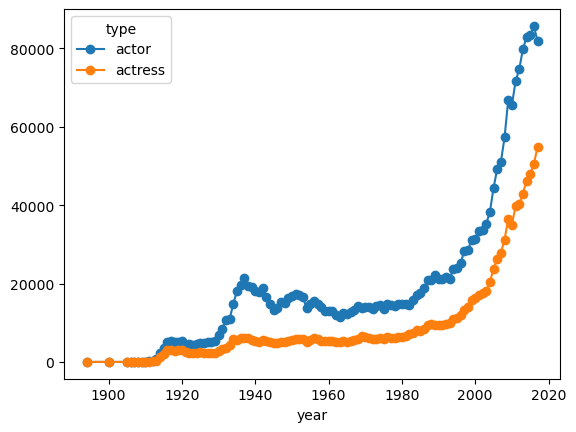

In [15]:
roles_over_time = cast[(cast['type'].isin(['actor', 'actress'])) & (cast['year'] <= 2017)].groupby(['year', 'type']).size().unstack().fillna(0)


roles_over_time.plot(kind='line', marker='o')


plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [16]:

leading_roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'] == 1.0)]

num_leading_roles_2000s = len(leading_roles_2000s)

print('Number of leading roles in the 2000s: {num_leading_roles_2000s}')

Number of leading roles in the 2000s: {num_leading_roles_2000s}


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [17]:

no_ranking_2000s = cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'].isnull())]


no_ranking_1950s = cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'].isnull())]

num_no_ranking_2000s = len(no_ranking_2000s)
num_no_ranking_1950s = len(no_ranking_1950s)

print('Number of roles with no ranking in the 2000s: {num_no_ranking_2000s}')
print('Number of roles with no ranking in the 1950s: {num_no_ranking_1950s}')

Number of roles with no ranking in the 2000s: {num_no_ranking_2000s}
Number of roles with no ranking in the 1950s: {num_no_ranking_1950s}


### 11. Plot the number of films made in each decade

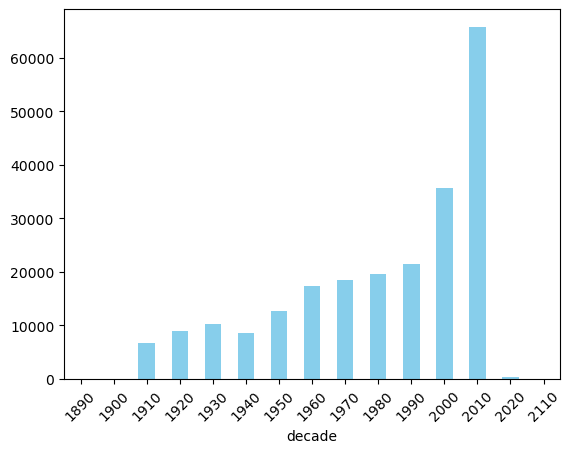

In [18]:

titles['decade'] = titles['year'] // 10 * 10


films_per_decade = titles.groupby('decade').size()


films_per_decade.plot(kind='bar', rot=45, color='skyblue')


plt.show()

### 12. Plot the number of films with a Rustler character over time

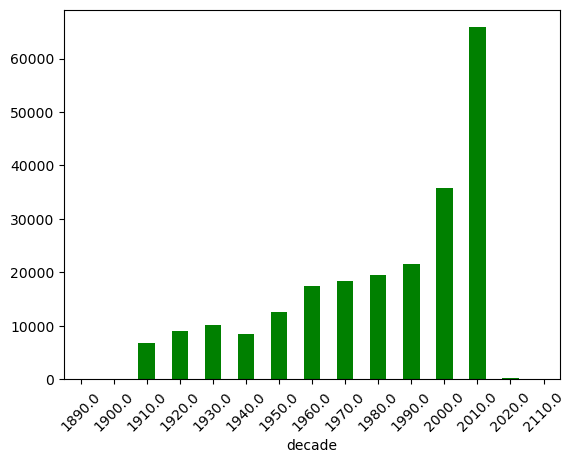

In [19]:

rustler_roles = cast[cast['character'] == 'Rustler']


merged_data = pd.concat([rustler_roles, titles], ignore_index=True)


films_with_rustler_per_decade = merged_data.groupby('decade').size()


films_with_rustler_per_decade.plot(kind='bar', rot=45, color='green')



plt.show()

### 13. What are the top ten character names of all time?

In [20]:
top_character_names = cast['name'].value_counts().head(10)

print("Top Ten Character Names of All Time:")
print(top_character_names)

Top Ten Character Names of All Time:
Bess Flowers       820
Herman Hack        698
Sam (II) Harris    656
Lee Phelps         615
Harold Miller      613
Frank O'Connor     598
Franklyn Farnum    561
Tom London         560
Larry Steers       553
Frank Ellis        545
Name: name, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [21]:

actors_1990s = cast[(cast['year'] >= 1990) & (cast['year'] < 2000) & (cast['type'] == 'actor')]


actor_appearances_1990s = actors_1990s['name'].value_counts()

most_appearances_actor = actor_appearances_1990s.idxmax()
num_appearances = actor_appearances_1990s.max()

print("The actor who appeared in the most films in the 1990s is {most_appearances_actor} with {num_appearances} appearances.")

The actor who appeared in the most films in the 1990s is {most_appearances_actor} with {num_appearances} appearances.


### 15. What are the top 10 roles that start with Science?

In [22]:
science_roles = cast[cast['character'].str.lower().str.startswith('science', na=False)]

top_10_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 Roles that Start with 'Science':")
print(top_10_science_roles)

Top 10 Roles that Start with 'Science':
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science                  4
Science Fair Teacher     3
Science Officer          3
Name: character, dtype: int64


### 16. What film has the largest cast

In [23]:

film_cast_counts = cast['title'].value_counts()

film_with_largest_cast = film_cast_counts.idxmax()

print("The film with the largest cast is '{film_with_largest_cast}' with a cast size of {film_cast_counts.max()}.")

The film with the largest cast is '{film_with_largest_cast}' with a cast size of {film_cast_counts.max()}.


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [24]:
cast_size_film = cast.groupby('title').count()
cast_size_statistics = cast_size_film.describe()
print("Descriptive Statistics for Cast Sizes:\n", cast_size_statistics)

Descriptive Statistics for Cast Sizes:
                 year           name           type      character  \
count  168255.000000  168255.000000  168255.000000  168255.000000   
mean       20.462405      20.462405      20.462405      20.462405   
std        24.206617      24.206617      24.206617      24.206617   
min         1.000000       1.000000       1.000000       1.000000   
25%         6.000000       6.000000       6.000000       6.000000   
50%        13.000000      13.000000      13.000000      13.000000   
75%        26.000000      26.000000      26.000000      26.000000   
max      1364.000000    1364.000000    1364.000000    1364.000000   

                   n  
count  168255.000000  
mean       12.570913  
std        17.335955  
min         0.000000  
25%         1.000000  
50%         8.000000  
75%        16.000000  
max       688.000000  


Therer are 168,255 number of casts. The average cast members per film is 20.4. The max is 1364 which concurrs with the previous question. 75% have 17. 

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [25]:

natalie_portman_films = cast[cast['name'] == 'Natalie Portman']


films_per_year = natalie_portman_films.groupby('year').size()


print("Number of films Natalie Portman has been in each year:")
print(films_per_year)

Number of films Natalie Portman has been in each year:
year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [26]:

natalie_portman_films = cast[(cast['name'] == 'Natalie Portman') & ((cast['n'] == 1.0) | (cast['n'] == 2.0))]


films_per_year = natalie_portman_films.groupby('year').size()


print("Number of films Natalie Portman appeared in each year as top star or co-star:")
print(films_per_year)

Number of films Natalie Portman appeared in each year as top star or co-star:
year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

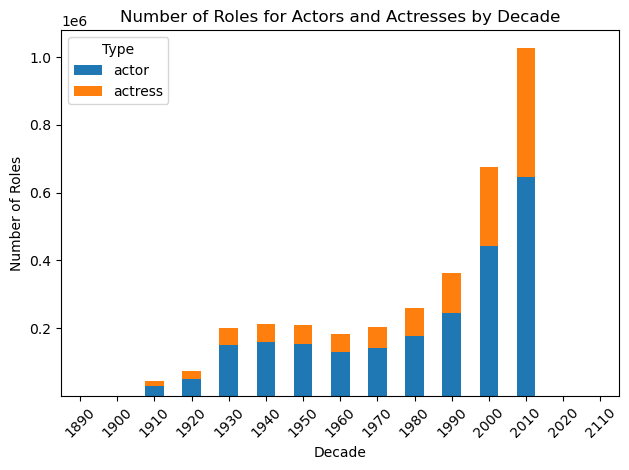

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

combined_data = pd.merge(cast, titles, on=['title', 'year'])


actor_actress_roles = combined_data[combined_data['type'].isin(['actor', 'actress'])]


actor_actress_roles['decade'] = actor_actress_roles['year'] // 10 * 10


roles_by_decade = actor_actress_roles.groupby(['decade', 'type']).size().unstack().fillna(0)


roles_by_decade.plot(kind='bar', stacked=True)


plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability


plt.legend(title='Type')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [31]:

release_dates['date'] = pd.to_datetime(release_dates['date'])


release_dates['day_of_week'] = release_dates['date'].dt.day_name()
release_dates['month'] = release_dates['date'].dt.month_name()


pivot_table_day_of_week = pd.pivot_table(release_dates, index='day_of_week', aggfunc='size')
pivot_table_month = pd.pivot_table(release_dates, index='month', aggfunc='size')


print("Movies Released by Day of the Week:")
print(pivot_table_day_of_week)
print("\nMovies Released by Month:")
print(pivot_table_month)

Movies Released by Day of the Week:
day_of_week
Friday       163174
Monday        37210
Saturday      31332
Sunday        15823
Thursday     125746
Tuesday       16762
Wednesday     53439
dtype: int64

Movies Released by Month:
month
April        37674
August       35011
December     39096
February     36307
January      39412
July         31421
June         32704
March        40257
May          35449
November     38201
October      40204
September    37750
dtype: int64


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

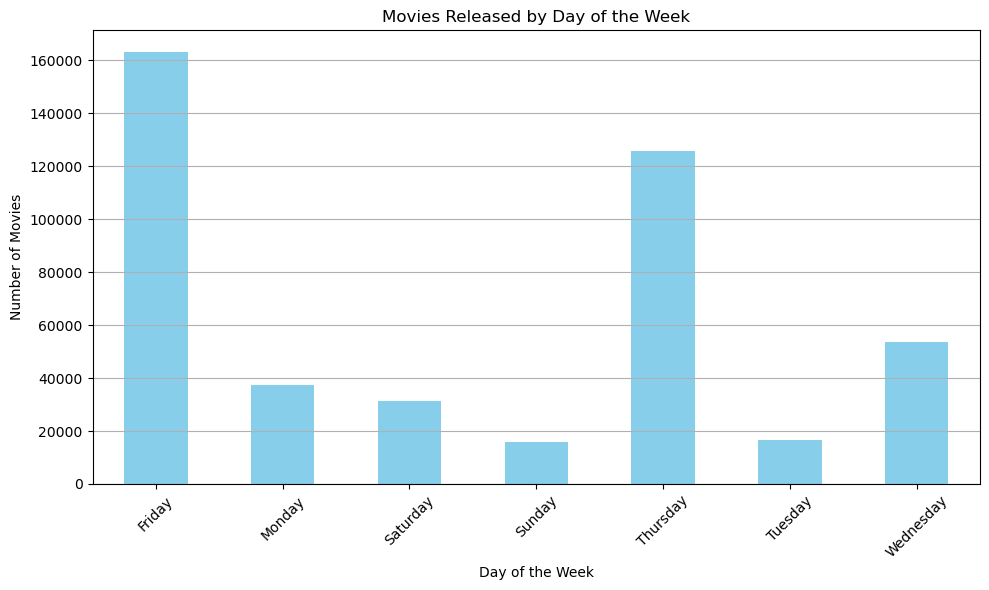

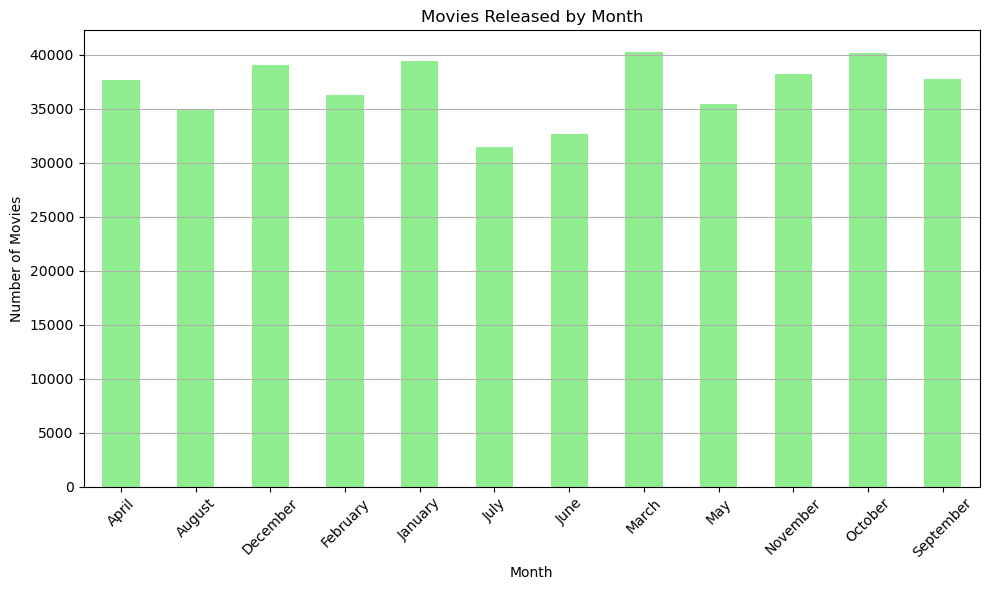

In [32]:

plt.figure(figsize=(10, 6))
pivot_table_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Movies Released by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
pivot_table_month.plot(kind='bar', color='lightgreen')
plt.title('Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#it is indeed correct

### 23. What films did actors in Star Wars go on to appear in? 

In [33]:

star_wars_actors = cast[cast['title'] == 'Star Wars']['name'].unique()


subsequent_films = cast[cast['name'].isin(star_wars_actors) & (cast['title'] != 'Star Wars')]


print("Films that actors in Star Wars went on to appear in:")
print(subsequent_films['title'].unique())

Films that actors in Star Wars went on to appear in:
['Every Little Crook and Nanny' 'Linda Lovelace for President' 'Rogue One'
 'Smorgasbord' 'The Roommates' 'The Sting II' 'The Student Body'
 'The Zebra Force' "Adventures of a Plumber's Mate"
 'Adventures of a Private Eye' 'Adventures of a Taxi Driver'
 'Alfie Darling' 'Big Zapper' 'Eskimo Nell' 'Hennessy'
 'Licensed to Love and Kill' 'The Deadly Females' 'The Fast Kill'
 'The Night My Number Came Up' 'The Swordsman' 'Track the Man Down'
 '24 Hour Party People' 'Amadeus' 'Flash Gordon' 'Labyrinth' 'Mona Lisa'
 'Sleeping Beauty' 'Star Wars: Episode I - The Phantom Menace'
 'Star Wars: Episode II - Attack of the Clones'
 'Star Wars: Episode III - Revenge of the Sith'
 'Star Wars: Episode V - The Empire Strikes Back'
 'Star Wars: Episode VI - Return of the Jedi' 'The Elephant Man'
 'The King and I' 'Time Bandits' 'U.F.O.' 'Willow' 'Wombling Free'
 'American Graffiti' 'Bizarre Devices'
 "Bon Voyage, Charlie Brown (and Don't Come Back!!)"

In [28]:
cast

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0


In [29]:
release_dates

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
...,...,...,...,...
443481,xXx: State of the Union,2005,Uruguay,2005-04-29
443482,xXx: State of the Union,2005,Poland,2005-06-03
443483,xXx: State of the Union,2005,Turkey,2005-06-03
443484,xXx: State of the Union,2005,China,2005-06-17


In [30]:
titles

,title,year,decade
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990
...,...,...,...
226008,Armageddon,1969,1960
226009,Verit i znat,1986,1980
226010,Muukalainen,2008,2000
226011,Byeolmyeongbuteun unjeonsa,1977,1970
